<a href="https://colab.research.google.com/github/nakul05/Projects_new/blob/main/Graduate_admission_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense



In [87]:
df = pd.read_csv('/content/Admission_Predict.csv')

In [88]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [89]:
df.shape

(400, 9)

In [90]:
df.isnull().sum() #no missing vvalues

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [91]:
df.duplicated().sum()

0

In [92]:
df.drop(columns=['Serial No.'],inplace=True)

In [93]:
x = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [94]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [95]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [96]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [97]:
x_train_scaled

array([[0.22      , 0.17857143, 0.25      , ..., 0.42857143, 0.25      ,
        1.        ],
       [0.88      , 0.96428571, 1.        , ..., 0.85714286, 0.91911765,
        1.        ],
       [0.3       , 0.71428571, 0.5       , ..., 0.57142857, 0.53308824,
        0.        ],
       ...,
       [0.7       , 0.53571429, 0.5       , ..., 0.57142857, 0.70220588,
        1.        ],
       [0.72      , 0.67857143, 1.        , ..., 0.71428571, 0.74632353,
        1.        ],
       [0.2       , 0.46428571, 0.        , ..., 0.14285714, 0.22058824,
        0.        ]])

In [98]:
model = Sequential()

In [110]:
model.add(Dense(7,activation ='relu',input_dim=7))
model.add(Dense(7,activation='relu'))
model.add(Dense(1,activation='linear'))

In [111]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 7)                 56        
                                                                 
 dense_9 (Dense)             (None, 1)                 8         
                                                                 
 dense_10 (Dense)            (None, 7)                 14        
                                                                 
 dense_11 (Dense)            (None, 7)                 56        
                                                                 
 dense_12 (Dense)            (None, 1)                 8         
                                                                 
Total params: 142 (568.00 Byte)
Trainable params: 142 (568.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [112]:
model.compile(loss='mean_squared_error',optimizer='Adam')

In [113]:
history = model.fit(x_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
8/8 [==============================] - 1s 28ms/step - loss: 0.4613 - val_loss: 0.4632
Epoch 2/100
8/8 [==============================] - 0s 6ms/step - loss: 0.3927 - val_loss: 0.3883
Epoch 3/100
8/8 [==============================] - 0s 6ms/step - loss: 0.3194 - val_loss: 0.3087
Epoch 4/100
8/8 [==============================] - 0s 7ms/step - loss: 0.2447 - val_loss: 0.2299
Epoch 5/100
8/8 [==============================] - 0s 9ms/step - loss: 0.1740 - val_loss: 0.1567
Epoch 6/100
8/8 [==============================] - 0s 6ms/step - loss: 0.1096 - val_loss: 0.0912
Epoch 7/100
8/8 [==============================] - 0s 8ms/step - loss: 0.0543 - val_loss: 0.0337
Epoch 8/100
8/8 [==============================] - 0s 9ms/step - loss: 0.0173 - val_loss: 0.0109
Epoch 9/100
8/8 [==============================] - 0s 6ms/step - loss: 0.0121 - val_loss: 0.0110
Epoch 10/100
8/8 [==============================] - 0s 9ms/step - loss: 0.0139 - val_loss: 0.0098
Epoch 11/100
8/8 [==========

In [114]:
y_pred = model.predict(x_test_scaled)

3/3 [==============================] - 0s 4ms/step


In [115]:
from sklearn.metrics import r2_score

In [116]:
r2_score(y_test,y_pred)

0.6894889286279535

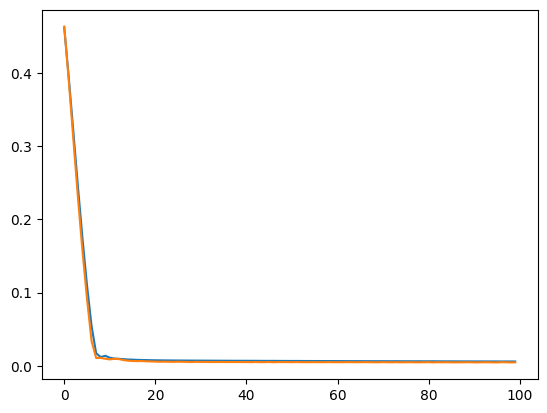

In [118]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])